The initial data "Life Expectancy data" which  downloaded from https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who  has been adjusted into a new dataset "Life Expectancy-Data-Updated"-https://www.kaggle.com/datasets/lashagoch/life-expectancy-who-updated. Data contains life expectancy, health, immunization, and economic and demographic information about 179 countries from 2000-2015 years with 21 variables and 2864 rows.

The database has one variable that categorizes countries into two groups: Developed vs Developing countries

Life expectancy is a statistical measure that represents the average number of years a person is expected to live based on various factors such as their birth year, gender, and other demographic characteristics. It is typically expressed as an average number of years and is often used as an indicator of the overall health and quality of life in a particular country or region.

In [1]:
#Import necessary liberaries 

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from scipy.stats import f_oneway



from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB, MultinomialNB

from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('Life-Expectancy-Data-Updated.csv')


Basic Data Exploration

This step is performed to guage the overall data. The volume of data, the types of columns present in the data.

Initial assessment of the data is done to identify which columns are Quantitative, Categorical or Qualitative.

This step helps to start the column rejection process. I am looking at each column carefully and ask, does this column affect the values of the Target variable? In thos case I am asking the question does this column affect the attrition of workers? If the answer is a clear "No", then I will remove the column immediately from the data, otherwise I am keep the column for further analysis.

There are four commands which are used for Basic data exploration in Python
head() : This helps to see a few sample rows of the data
info() : This provides the summarized information of the data
describe() : This provides the descriptive statistical details of the data
nunique(): This helps us to identify if a column is categorical or continuous

In [3]:
df.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


In [4]:
df.info()#Check the columns and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      2864 non-null   object 
 1   Region                       2864 non-null   object 
 2   Year                         2864 non-null   int64  
 3   Infant_deaths                2864 non-null   float64
 4   Under_five_deaths            2864 non-null   float64
 5   Adult_mortality              2864 non-null   float64
 6   Alcohol_consumption          2864 non-null   float64
 7   Hepatitis_B                  2864 non-null   int64  
 8   Measles                      2864 non-null   int64  
 9   BMI                          2864 non-null   float64
 10  Polio                        2864 non-null   int64  
 11  Diphtheria                   2864 non-null   int64  
 12  Incidents_HIV                2864 non-null   float64
 13  GDP_per_capita    

In [5]:
#Looking at the descriptive statistics of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2864.0,2007.500000,4.610577,2000.000,2003.75000,2007.5000,2011.250000,2015.0000
Infant_deaths,2864.0,30.363792,27.538117,1.800,8.10000,19.6000,47.350000,138.1000
Under_five_deaths,2864.0,42.938268,44.569974,2.300,9.67500,23.1000,66.000000,224.9000
Adult_mortality,2864.0,192.251775,114.910281,49.384,106.91025,163.8415,246.791375,719.3605
Alcohol_consumption,2864.0,4.820882,3.981949,0.000,1.20000,4.0200,7.777500,17.8700
Hepatitis_B,2864.0,84.292598,15.995511,12.000,78.00000,89.0000,96.000000,99.0000
Measles,2864.0,77.344972,18.659693,10.000,64.00000,83.0000,93.000000,99.0000
BMI,2864.0,25.032926,2.193905,19.800,23.20000,25.5000,26.400000,32.1000
Polio,2864.0,86.499651,15.080365,8.000,81.00000,93.0000,97.000000,99.0000
Diphtheria,2864.0,86.271648,15.534225,16.000,81.00000,93.0000,97.000000,99.0000


In [6]:
# Finding unique values for each column
# To understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is 
# likely to be a category otherwise continuous
df.nunique()

Country                         179
Region                            9
Year                             16
Infant_deaths                   847
Under_five_deaths              1035
Adult_mortality                2850
Alcohol_consumption            1164
Hepatitis_B                      80
Measles                          87
BMI                             120
Polio                            77
Diphtheria                       80
Incidents_HIV                   393
GDP_per_capita                 2564
Population_mln                 1803
Thinness_ten_nineteen_years     200
Thinness_five_nine_years        207
Schooling                       130
Economy_status_Developed          2
Economy_status_Developing         2
Life_expectancy                 396
dtype: int64

In [7]:
df.shape

(2864, 21)

In [8]:
# Check missing/ null values in variables
df.isnull().sum()

Country                        0
Region                         0
Year                           0
Infant_deaths                  0
Under_five_deaths              0
Adult_mortality                0
Alcohol_consumption            0
Hepatitis_B                    0
Measles                        0
BMI                            0
Polio                          0
Diphtheria                     0
Incidents_HIV                  0
GDP_per_capita                 0
Population_mln                 0
Thinness_ten_nineteen_years    0
Thinness_five_nine_years       0
Schooling                      0
Economy_status_Developed       0
Economy_status_Developing      0
Life_expectancy                0
dtype: int64

In [9]:
duplicate_rows = df[df.duplicated()]
print('Number of duplicate rows: {}'.format(duplicate_rows.shape)) 

Number of duplicate rows: (0, 21)


Defining the problem statement

I am creating a Predictive model which can tell life expectabcy in regions of countries around the world based on factors that are represented in variables in the dataset ? Target Variable: Life expectancy

Predictors: Region,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption, Hepatitis_B, Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln, Thinness_ten_nineteen_years,Thinness_five_nine_years, Schooling,


Life expectancy Low = 0 Life expectancy high = 1

In [10]:
df.columns # call all the columns

Index(['Country', 'Region', 'Year', 'Infant_deaths', 'Under_five_deaths',
       'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 'Measles',
       'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita',
       'Population_mln', 'Thinness_ten_nineteen_years',
       'Thinness_five_nine_years', 'Schooling', 'Economy_status_Developed',
       'Economy_status_Developing', 'Life_expectancy'],
      dtype='object')

In [11]:
# drop features not related to the project goal

df = df.drop(['Country', 'Year'],axis=1)

The 2020 average normal retirement age across OECD countries for an individual with a full career and who entered the labour market at age 22 was equal to 63.4 years for women and 64.2 years for men.

In [12]:
#Grouping values in the target variable "life expectancy" into low vs high. 

#The threshold will be defined as 64. This is based on the world's average retirement age 


threshold = 64

# Categorize values into 'low' or 'high'

df['Life_Expectancy_Category'] = df['Life_expectancy'].apply(lambda x: 'low' if x < threshold else 'high')

df.head()


,Region,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy,Life_Expectancy_Category
0,Middle East,11.1,13.0,105.8240,1.32,97,65,27.8,97,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5,high
1,European Union,2.7,3.3,57.9025,10.35,97,94,26.0,97,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8,high
2,Asia,51.5,67.9,201.0765,1.57,60,35,21.2,67,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4,high
3,South America,32.8,40.5,222.1965,5.68,93,74,25.3,92,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0,high
4,Middle East,3.4,4.3,57.9510,2.89,97,89,27.0,94,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7,high


In [13]:
# I now craeted a new dataframe df2 for useful columns   
  
df2 = df.drop(['Life_expectancy'],axis=1)

# Replace Life_Expectancy_Category column with 1 (high) and 0 (low)

df2['Life_Expectancy_Category'].replace('high', 1, inplace = True)
df2['Life_Expectancy_Category'].replace('low', 0, inplace = True)

df2.head()



,Region,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_Expectancy_Category
0,Middle East,11.1,13.0,105.8240,1.32,97,65,27.8,97,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,1
1,European Union,2.7,3.3,57.9025,10.35,97,94,26.0,97,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,1
2,Asia,51.5,67.9,201.0765,1.57,60,35,21.2,67,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,1
3,South America,32.8,40.5,222.1965,5.68,93,74,25.3,92,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,1
4,Middle East,3.4,4.3,57.9510,2.89,97,89,27.0,94,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,1


Looking at the distribution of Target variable

I am looking at the target variable’s distribution of each class to make sure there is class balance.

This is important because if target variable's distribution is too skewed, the class imbalance will impact the machine learning algorithm ability to learn all the classes, thus, the predictive modeling will not be possible.

Bell curve is desirable but slightly positive skew or negative skew is also fine for performing Classification.

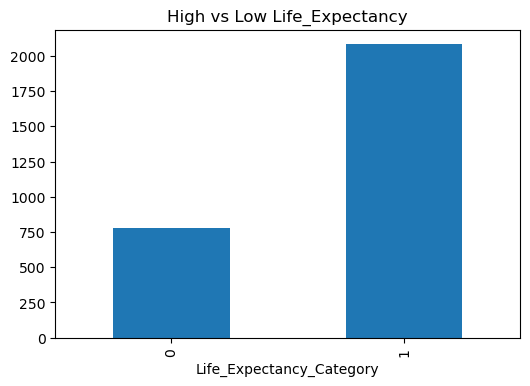

In [14]:
# Creating Bar chart as the Target variable is Categorical
GroupedData = df2.groupby('Life_Expectancy_Category').size()
GroupedData.plot(kind='bar', figsize=(6,4), title='High vs Low Life_Expectancy');

NOTE: We can see that the there is class inbalance in the distribution of target variable Life_Expectancy_Category

## Visual Exploratory Data Analysis

In [15]:
df2.nunique()

Region                            9
Infant_deaths                   847
Under_five_deaths              1035
Adult_mortality                2850
Alcohol_consumption            1164
Hepatitis_B                      80
Measles                          87
BMI                             120
Polio                            77
Diphtheria                       80
Incidents_HIV                   393
GDP_per_capita                 2564
Population_mln                 1803
Thinness_ten_nineteen_years     200
Thinness_five_nine_years        207
Schooling                       130
Economy_status_Developed          2
Economy_status_Developing         2
Life_Expectancy_Category          2
dtype: int64

Categorical variables: Bar plot
Continuous variables: Histogram

I will visualize distribution of all the Categorical Predictor variables in the data using bar plots

Categorical variable in the data can be spotted by looking at the unique values in them. Typically a categorical variable contains less than 20 Unique values AND there is repetition of values, which means the data can be grouped by those unique values.

Based on the Basic Data Exploration above, we have spotted nine categorical predictors in the dataset

Categorical Predictors: 'Region'

We use bar charts to see how the data is distributed for this categorical columns.

In [16]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(30,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

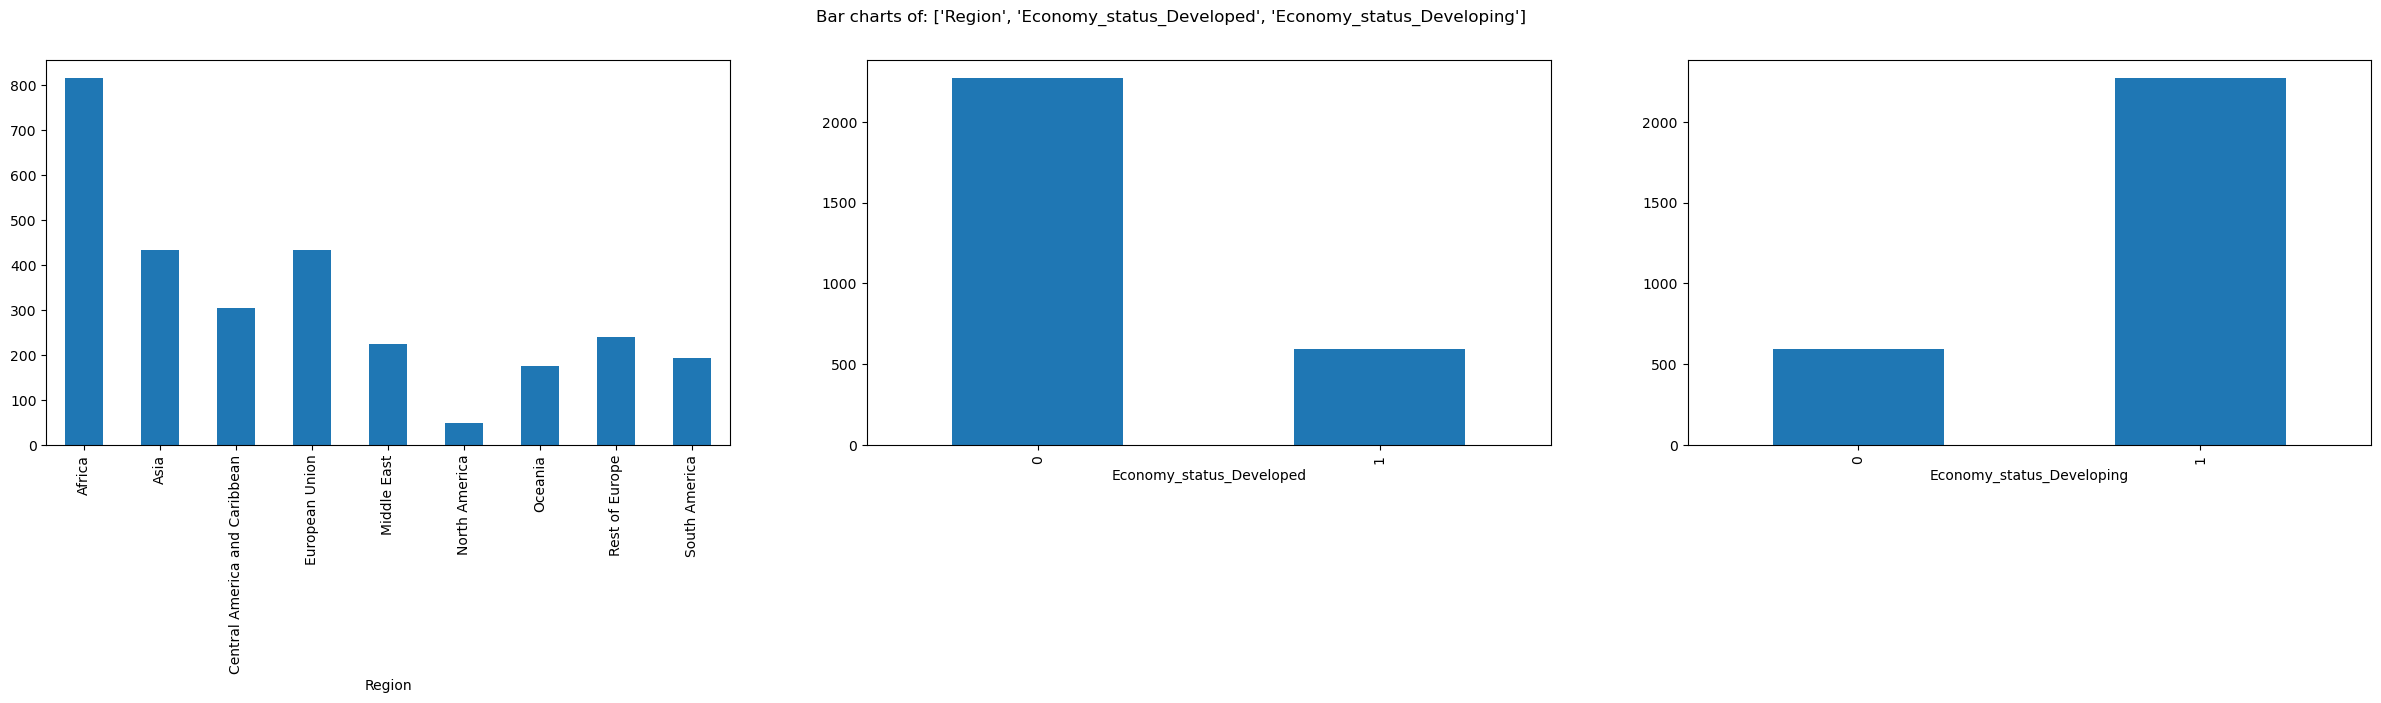

In [17]:
# Calling the function
PlotBarCharts(inpData=df2, colsToPlot=['Region','Economy_status_Developed','Economy_status_Developing']);

### Bar Charts Interpretation

These bar charts represent the frequencies of each category in the Y-axis and the category names in the X-axis.

In the ideal bar chart each category has comparable frequency. Hence, there are enough rows for each category in the data for the ML algorithm to learn.

If there is a column which shows too skewed distribution where there is only one dominant bar and the other categories are present in very low numbers. These kind of columns may not be very helpful in machine learning. We confirm this in the correlation analysis section and take a final call to select or reject the column.

In this dataset, all the categorical columns have satisfactory distribution to be considered for machine learning.

Selected Categorical Variables: All the categorical variables are selected for further analysis.

Region, Economy_status_Developed,Economy_status_Developing.

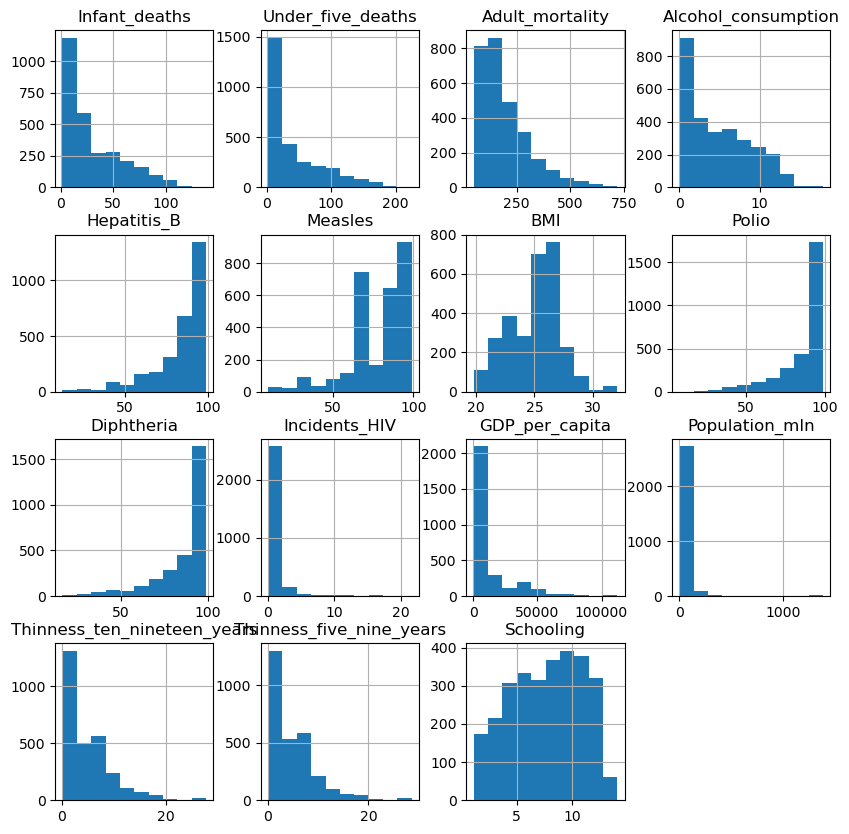

In [18]:
#Plotting histograms of multiple continous variable columns together
df2.hist(['Infant_deaths','Under_five_deaths',
       'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 'Measles',
       'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita',
       'Population_mln', 'Thinness_ten_nineteen_years',
       'Thinness_five_nine_years', 'Schooling'], figsize=(10,10));

### Histogram Interpretation

Histograms shows us the data distribution for a single continuous variable.

The X-axis shows the range of values and Y-axis represent the number of values in that range.


The ideal outcome for histogram is a bell curve or slightly skewed bell curve. If there is too much skewness, then outlier treatment should be done and the column should be re-examined, if that also does not solve the problem then only reject the column.

ForSelected Continuous Variables: The distribution will be futher analysed to be considered for machine learning.

## Statistical Analysis

In [19]:
# drop column 'Attrition'
Stat_df = df2.drop(['Life_Expectancy_Category'], axis=1)

In [20]:
Stat_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Infant_deaths,2864.0,30.363792,27.538117,1.800,8.10000,19.6000,47.350000,138.1000
Under_five_deaths,2864.0,42.938268,44.569974,2.300,9.67500,23.1000,66.000000,224.9000
Adult_mortality,2864.0,192.251775,114.910281,49.384,106.91025,163.8415,246.791375,719.3605
Alcohol_consumption,2864.0,4.820882,3.981949,0.000,1.20000,4.0200,7.777500,17.8700
Hepatitis_B,2864.0,84.292598,15.995511,12.000,78.00000,89.0000,96.000000,99.0000
Measles,2864.0,77.344972,18.659693,10.000,64.00000,83.0000,93.000000,99.0000
BMI,2864.0,25.032926,2.193905,19.800,23.20000,25.5000,26.400000,32.1000
Polio,2864.0,86.499651,15.080365,8.000,81.00000,93.0000,97.000000,99.0000
Diphtheria,2864.0,86.271648,15.534225,16.000,81.00000,93.0000,97.000000,99.0000
Incidents_HIV,2864.0,0.894288,2.381389,0.010,0.08000,0.1500,0.460000,21.6800


NOTE: From the table we can see basics statistics all numerical columns. Taking the BMI column for example: Mean (Average) BMI of the population is 25.032926 +/-2.193905 (the standard deviation, std). The median BMI of the population being 25.5000

### Correlation matrices

I am going to visualize the relation between the Target variable (Life_Expectancy_Category) and each of the predictors to get a better sense of data

### Relationship exploration: Categorical Vs Continuous -- Box Plots

The target variable (Life_Expectancy_Category) is Categorical and the predictor variable is Continuous I analyze the relation using bar plots/Boxplots and measure the strength of relation using Anova test

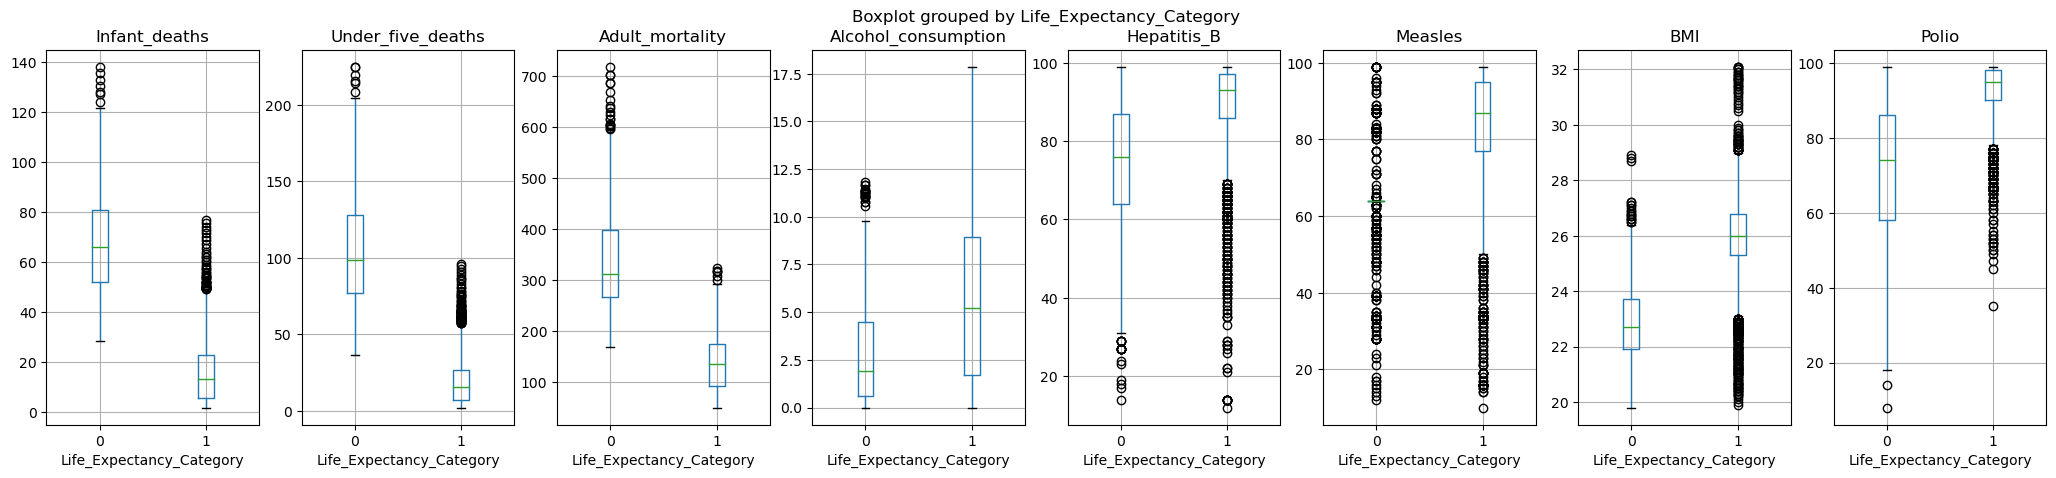

In [23]:
# Box plots for Categorical Target Variable and continuous predictors
ContinuousColsList = ['Infant_deaths','Under_five_deaths',
       'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 'Measles',
       'BMI', 'Polio']

fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(ContinuousColsList), figsize=(25,5))

# Creating box plots for each continuous predictor against the Target Variable
for PredictorCol , i in zip(ContinuousColsList, range(len(ContinuousColsList))):
    df2.boxplot(column=PredictorCol, by='Life_Expectancy_Category', figsize=(5,5), vert=True, ax=PlotCanvas[i])

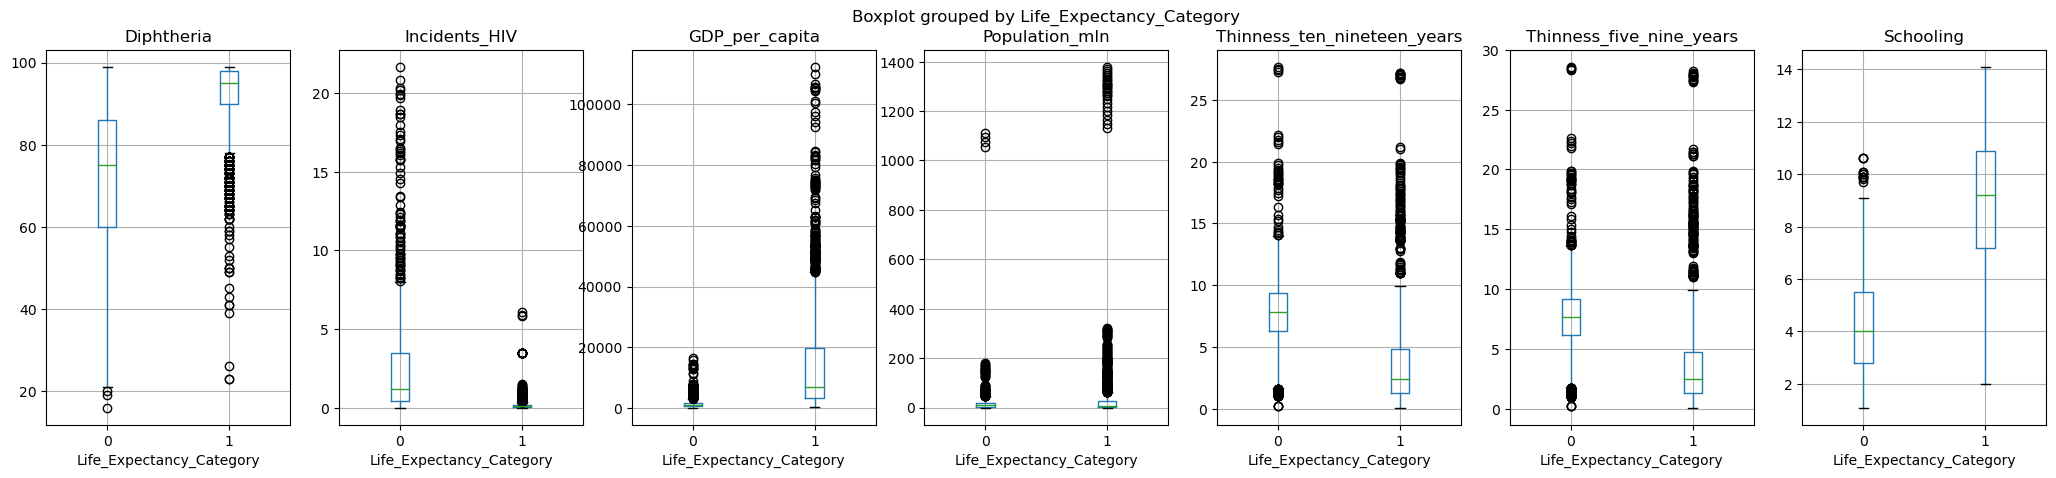

In [25]:
# Box plots for Categorical Target Variable and continuous predictors
ContinuousColsList = ['Diphtheria', 'Incidents_HIV', 'GDP_per_capita',
       'Population_mln', 'Thinness_ten_nineteen_years',
       'Thinness_five_nine_years', 'Schooling']

fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(ContinuousColsList), figsize=(25,5))

# Creating box plots for each continuous predictor against the Target Variable
for PredictorCol , i in zip(ContinuousColsList, range(len(ContinuousColsList))):
    df2.boxplot(column=PredictorCol, by='Life_Expectancy_Category', figsize=(5,5), vert=True, ax=PlotCanvas[i])

NOTE: Box-Plots interpretation

These plots gives an idea about the data distribution of continuous predictor in the Y-axis for each of the category in the X-Axis.

If the distribution looks similar for each category(Boxes are in the same line), that means the the continuous variable has NO effect on the target variable. Hence, the variables are not correlated to each other.

In the charts the boxes are in different lines. This means the data distribution is different(the boxes are not in same line!) for each category of attrition. It hints that these variables might be correlated with attrition.

### Categorical Vs Continuous) using ANOVA test

Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable

Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Target variable is same for all the groups in the categorical Predictor variable)

ANOVA Test result: Probability of H0 being true

In [26]:
# Defining a function to find the statistical relationship with all the continous variables
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    return(SelectedPredictors)

In [27]:
# Calling the function to check which continous variables are correlated with target
ContinuousVariables=['Infant_deaths','Under_five_deaths',
       'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 'Measles',
       'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita',
       'Population_mln', 'Thinness_ten_nineteen_years',
       'Thinness_five_nine_years', 'Schooling']
FunctionAnova(inpData=df2, TargetVariable='Life_Expectancy_Category', ContinuousPredictorList=ContinuousVariables)

##### ANOVA Results ##### 

Infant_deaths is correlated with Life_Expectancy_Category | P-Value: 0.0
Under_five_deaths is correlated with Life_Expectancy_Category | P-Value: 0.0
Adult_mortality is correlated with Life_Expectancy_Category | P-Value: 0.0
Alcohol_consumption is correlated with Life_Expectancy_Category | P-Value: 2.4158365242216077e-60
Hepatitis_B is correlated with Life_Expectancy_Category | P-Value: 2.7362962953964935e-123
Measles is correlated with Life_Expectancy_Category | P-Value: 2.1010780706175882e-149
BMI is correlated with Life_Expectancy_Category | P-Value: 8.12210810213787e-305
Polio is correlated with Life_Expectancy_Category | P-Value: 2.638864619157098e-301
Diphtheria is correlated with Life_Expectancy_Category | P-Value: 5.787394456243716e-280
Incidents_HIV is correlated with Life_Expectancy_Category | P-Value: 6.502549144832511e-160
GDP_per_capita is correlated with Life_Expectancy_Category | P-Value: 9.51279416370404e-89
Population_mln is correlated with 

['Infant_deaths',
 'Under_five_deaths',
 'Adult_mortality',
 'Alcohol_consumption',
 'Hepatitis_B',
 'Measles',
 'BMI',
 'Polio',
 'Diphtheria',
 'Incidents_HIV',
 'GDP_per_capita',
 'Population_mln',
 'Thinness_ten_nineteen_years',
 'Thinness_five_nine_years',
 'Schooling']

NOTE: The results of ANOVA confirm our visual analysis using box plots above.

In [50]:
from matplotlib import pyplot

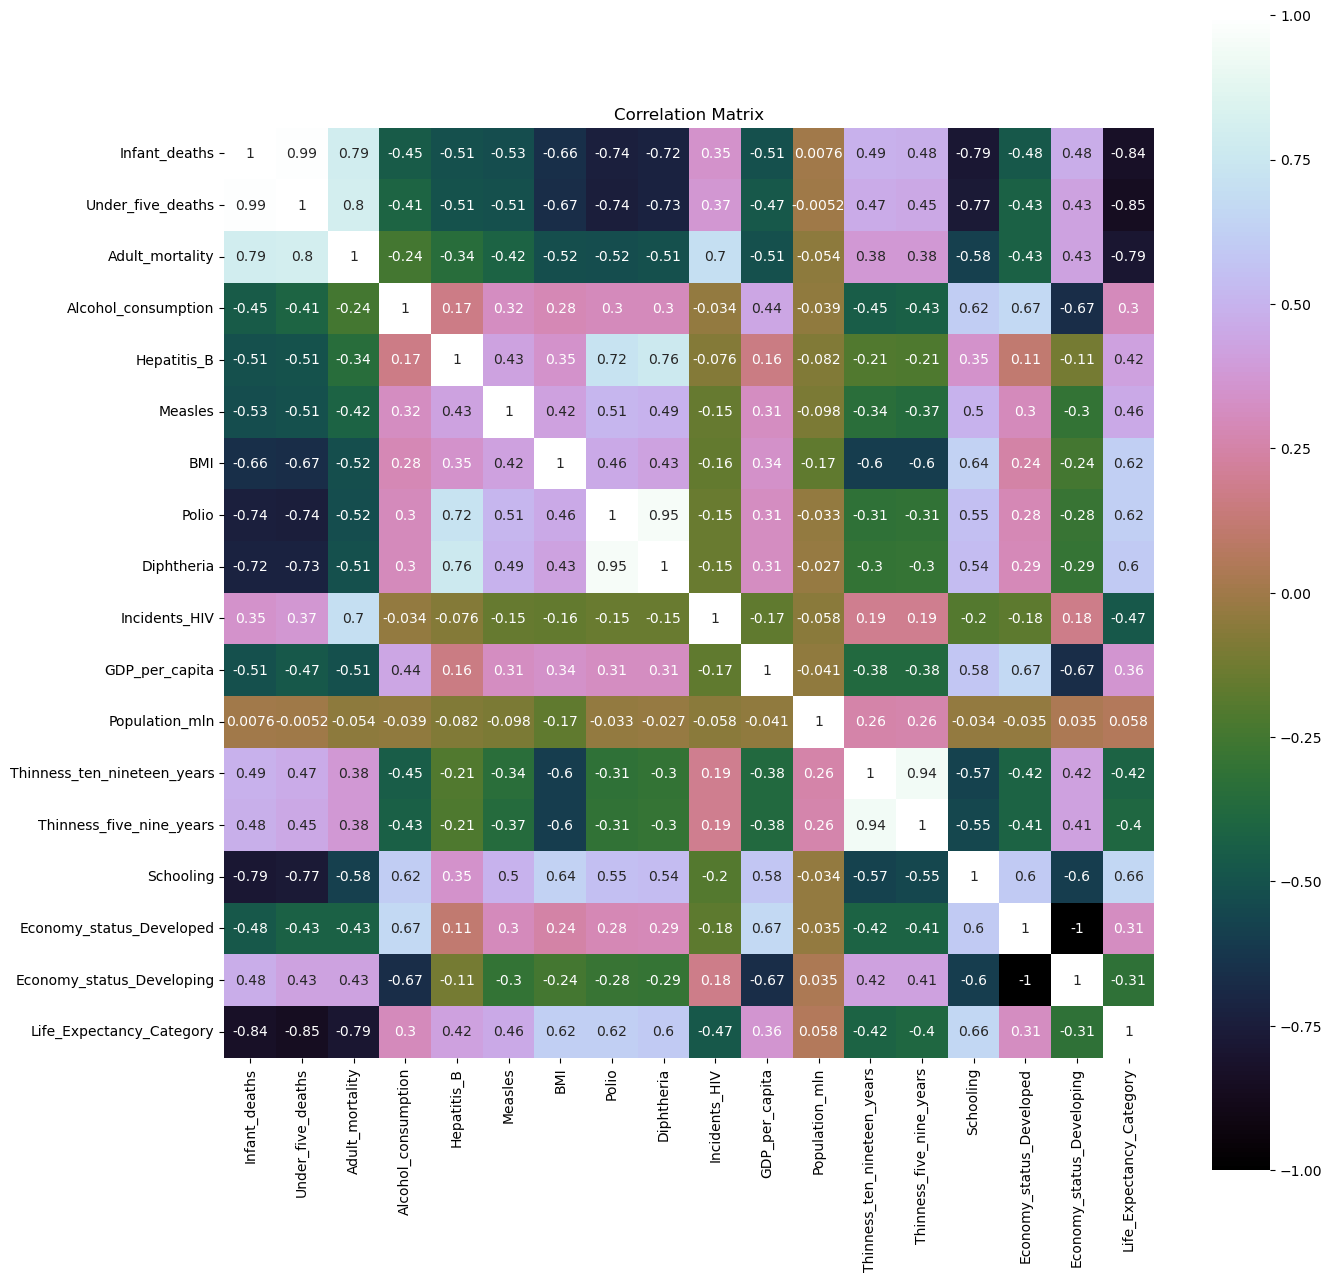

In [51]:
correlation = df2.corr()
pyplot.figure(figsize=(15,15))
pyplot.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix');

### Relationship exploration: Categorical Vs Categorical -- Grouped Bar Charts

When the target variable is Categorical and the predictor is also Categorical then we explore the correlation between them visually using barplots and statistically using Chi-square test

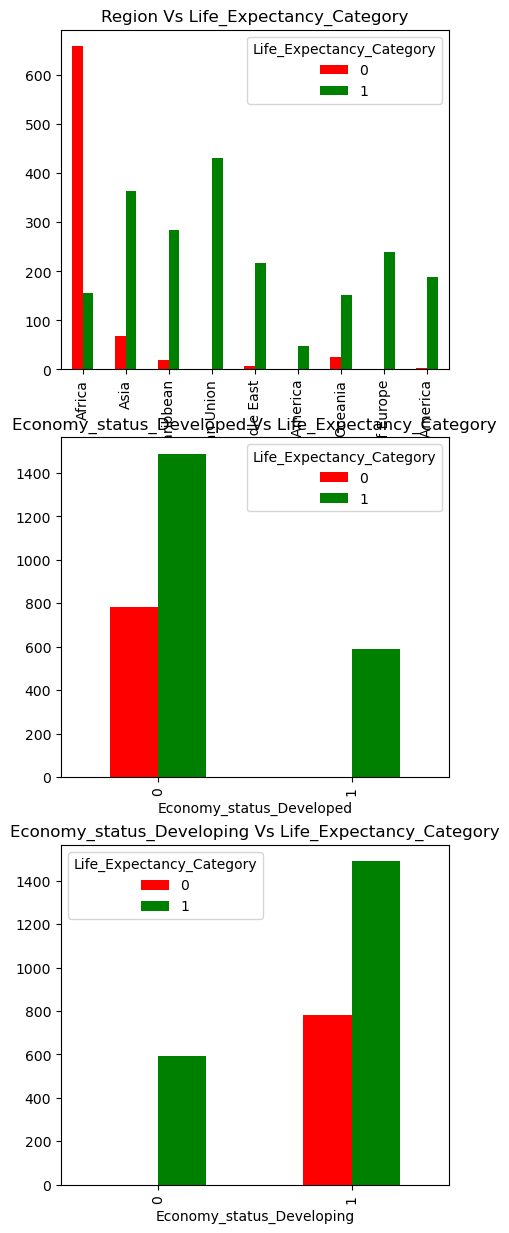

In [33]:
# Visual Inference using Grouped Bar charts
CategoricalColsList=['Region','Economy_status_Developed','Economy_status_Developing']
fig, PlotCanvas=plt.subplots(nrows=len(CategoricalColsList), ncols=1, figsize=(5,15))

# Creating Grouped bar plots for each categorical predictor against the Target Variable "Attrition"
for CategoricalCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    CrossTabResult=pd.crosstab(index=df2[CategoricalCol], columns=df2['Life_Expectancy_Category'])
    CrossTabResult.plot.bar(color=['red','green'], ax=PlotCanvas[i], title=CategoricalCol+' Vs Life_Expectancy_Category')

NOTE: Grouped Bar charts Interpretation
These grouped bar charts show the frequency in the Y-Axis and the category in the X-Axis. If the ratio of bars is similar across all categories, then the two columns are not correlated.

I confirm this analysis in below section by using Chi-Square Tests.

### Chi-Square Test

Chi-Square test is conducted to check the correlation between two categorical variables

Assumption(H0): The two columns are NOT related to each other Result of Chi-Sq Test:The Probability of H0 being True

In [34]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

In [35]:
CategoricalVariables=['Region','Economy_status_Developed','Economy_status_Developing']

# Calling the function
FunctionChisq(inpData=df2, 
              TargetVariable='Life_Expectancy_Category',
              CategoricalVariablesList= CategoricalVariables)

Region is correlated with Life_Expectancy_Category | P-Value: 0.0
Economy_status_Developed is correlated with Life_Expectancy_Category | P-Value: 1.5453129678739983e-62
Economy_status_Developing is correlated with Life_Expectancy_Category | P-Value: 1.5453129678739983e-62


['Region', 'Economy_status_Developed', 'Economy_status_Developing']

In [36]:
import seaborn as sns

In [37]:
#using regression plot to visualise correlation between  continous variables and target variable

categorical_variables = ['Region','Economy_status_Developed','Economy_status_Developing']
df3 = Stat_df .drop(categorical_variables,axis=1)
df3.head()

,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling
0,11.1,13.0,105.8240,1.32,97,65,27.8,97,97,0.08,11006,78.53,4.9,4.8,7.8
1,2.7,3.3,57.9025,10.35,97,94,26.0,97,97,0.09,25742,46.44,0.6,0.5,9.7
2,51.5,67.9,201.0765,1.57,60,35,21.2,67,64,0.13,1076,1183.21,27.1,28.0,5.0
3,32.8,40.5,222.1965,5.68,93,74,25.3,92,93,0.79,4146,0.75,5.7,5.5,7.9
4,3.4,4.3,57.9510,2.89,97,89,27.0,94,94,0.08,33995,7.91,1.2,1.1,12.8


In [38]:
#now concat target variable Life expectancy category

df_clean = pd.concat([df2['Life_Expectancy_Category'], df3], axis=1)

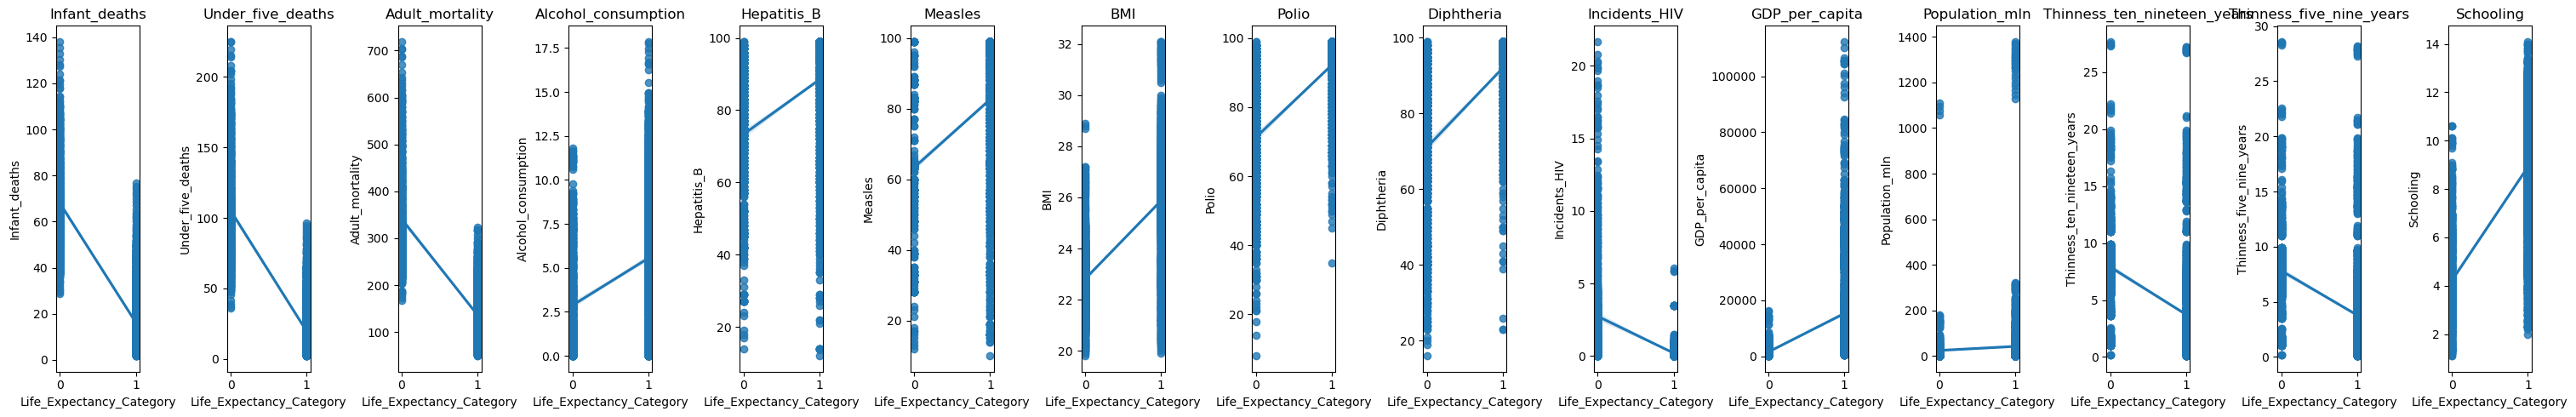

In [44]:
# # Set up the plot
fig, axs = plt.subplots(ncols= 15, nrows=1, figsize=(30,5))
axs = axs.flatten()

# Loop through each column and generate a regression plot
for i, column in enumerate(df_clean.columns[1:]):
    sns.regplot(x='Life_Expectancy_Category', y=column, data=df_clean, ax=axs[i])
    axs[i].set_title(column)

plt.tight_layout()
plt.show()

In [45]:
columns_notused = ['Economy_status_Developed','Economy_status_Developing','Life_Expectancy_Category']

# I now craete a new dataframe df3 for useful columns   
df_numeric = df2.drop(columns_notused,axis=1)
df_numeric.head()

,Region,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling
0,Middle East,11.1,13.0,105.8240,1.32,97,65,27.8,97,97,0.08,11006,78.53,4.9,4.8,7.8
1,European Union,2.7,3.3,57.9025,10.35,97,94,26.0,97,97,0.09,25742,46.44,0.6,0.5,9.7
2,Asia,51.5,67.9,201.0765,1.57,60,35,21.2,67,64,0.13,1076,1183.21,27.1,28.0,5.0
3,South America,32.8,40.5,222.1965,5.68,93,74,25.3,92,93,0.79,4146,0.75,5.7,5.5,7.9
4,Middle East,3.4,4.3,57.9510,2.89,97,89,27.0,94,94,0.08,33995,7.91,1.2,1.1,12.8


In [46]:
## Treating all the nominal variables Region using dummy variables
df_dummies = pd.get_dummies(df_numeric)


## Printing sample rows
df_dummies.head()

,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,...,Schooling,Region_Africa,Region_Asia,Region_Central America and Caribbean,Region_European Union,Region_Middle East,Region_North America,Region_Oceania,Region_Rest of Europe,Region_South America
0,11.1,13.0,105.8240,1.32,97,65,27.8,97,97,0.08,...,7.8,0,0,0,0,1,0,0,0,0
1,2.7,3.3,57.9025,10.35,97,94,26.0,97,97,0.09,...,9.7,0,0,0,1,0,0,0,0,0
2,51.5,67.9,201.0765,1.57,60,35,21.2,67,64,0.13,...,5.0,0,1,0,0,0,0,0,0,0
3,32.8,40.5,222.1965,5.68,93,74,25.3,92,93,0.79,...,7.9,0,0,0,0,0,0,0,0,1
4,3.4,4.3,57.9510,2.89,97,89,27.0,94,94,0.08,...,12.8,0,0,0,0,1,0,0,0,0


In [47]:
# merge the Status column with the numerical columns
df_clean = pd.concat([df2['Life_Expectancy_Category'], df_dummies], axis=1)

In [48]:
df_clean.head()

,Life_Expectancy_Category,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,...,Schooling,Region_Africa,Region_Asia,Region_Central America and Caribbean,Region_European Union,Region_Middle East,Region_North America,Region_Oceania,Region_Rest of Europe,Region_South America
0,1,11.1,13.0,105.8240,1.32,97,65,27.8,97,97,...,7.8,0,0,0,0,1,0,0,0,0
1,1,2.7,3.3,57.9025,10.35,97,94,26.0,97,97,...,9.7,0,0,0,1,0,0,0,0,0
2,1,51.5,67.9,201.0765,1.57,60,35,21.2,67,64,...,5.0,0,1,0,0,0,0,0,0,0
3,1,32.8,40.5,222.1965,5.68,93,74,25.3,92,93,...,7.9,0,0,0,0,0,0,0,0,1
4,1,3.4,4.3,57.9510,2.89,97,89,27.0,94,94,...,12.8,0,0,0,0,1,0,0,0,0


### Selecting final predictors for Machine Learning

Based on the above tests, selecting the final columns for machine learning. I am dropping all the  categorical variables namley Economy_status_Developed','Economy_statu s_Developing as there is little evidence they can  support Life expectancy 

In [52]:
# Convert all the columns to float except column 'Life_expectancy_category' to improve ML
num_cols = df_clean.drop(['Life_Expectancy_Category'], axis=1).astype(float)

NOTE: All numerical values are converted to floats to ensures that the data can be used with a wide range of models without any compatibility issues

In [53]:
#merge the Life_Expectancy_Category column with the numerical columns 
DataForML = pd.concat([df_clean['Life_Expectancy_Category'], num_cols], axis=1)

In [55]:
DataForML.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Life_Expectancy_Category              2864 non-null   int64  
 1   Infant_deaths                         2864 non-null   float64
 2   Under_five_deaths                     2864 non-null   float64
 3   Adult_mortality                       2864 non-null   float64
 4   Alcohol_consumption                   2864 non-null   float64
 5   Hepatitis_B                           2864 non-null   float64
 6   Measles                               2864 non-null   float64
 7   BMI                                   2864 non-null   float64
 8   Polio                                 2864 non-null   float64
 9   Diphtheria                            2864 non-null   float64
 10  Incidents_HIV                         2864 non-null   float64
 11  GDP_per_capita   

## SMOTE: (Synthetic Minority Over-sampling Technique)

Because there is class inbalance in the distribution of target variable 'Life_Expectancy_Category'
I am using SMOTE method to balance the class distribution

In [56]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [57]:
# Separate the features and labels
X = DataForML.drop(columns=['Life_Expectancy_Category'])
y = DataForML['Life_Expectancy_Category']

In [58]:
# Apply SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

In [59]:
# Combine the oversampled minority class with the majority class
balanced_data = pd.concat([X_resampled, y_resampled], axis=1)

In [60]:
# Shuffle the dataset
balanced_data = balanced_data.sample(frac=1)

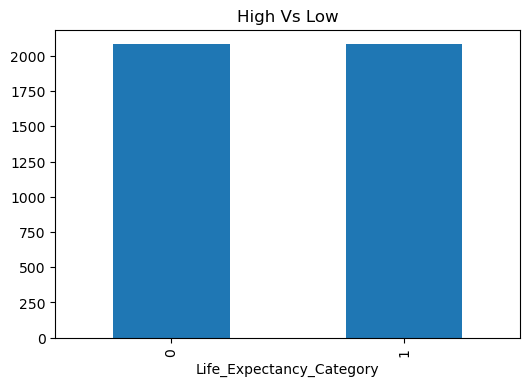

In [61]:
# Creating bar chat to look at the resampled target variable
resampled  = balanced_data.groupby('Life_Expectancy_Category').size()
resampled.plot(kind='bar', figsize=(6,4), title='High Vs Low');

NOTE: SMOTE was applied to solve the class balance by creating synthetic examples of the minority class by randomly selecting one of its neighbors and generating a new example along the line joining the two points.
After applying SMOTE, I now combine the oversampled minority class with the majority class to create a new balanced dataset.
I then Shuffled the balanced dataset to remove any biases introduced by the oversampling technique.

### Standardization of data

Data standardization is an important technique in data preprocessing. The goal of data standardization is to transform the numeric variables so that each variable has zero mean and unit variance.

In [62]:
# Printing all the column names for our reference
balanced_data.columns

Index(['Infant_deaths', 'Under_five_deaths', 'Adult_mortality',
       'Alcohol_consumption', 'Hepatitis_B', 'Measles', 'BMI', 'Polio',
       'Diphtheria', 'Incidents_HIV', 'GDP_per_capita', 'Population_mln',
       'Thinness_ten_nineteen_years', 'Thinness_five_nine_years', 'Schooling',
       'Region_Africa', 'Region_Asia', 'Region_Central America and Caribbean',
       'Region_European Union', 'Region_Middle East', 'Region_North America',
       'Region_Oceania', 'Region_Rest of Europe', 'Region_South America',
       'Life_Expectancy_Category'],
      dtype='object')

In [63]:
X = balanced_data.drop(columns="Life_Expectancy_Category")
y = balanced_data.Life_Expectancy_Category

In [64]:
# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [65]:
# Scale our data using Normalisation (Standard scaler)
scaler = StandardScaler()
# Fit training data
X_train = pd.DataFrame(scaler.fit_transform(X_train))
# Fit transform the X_test
X_test = pd.DataFrame(scaler.transform(X_test))

In [66]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2914, 24), (1250, 24), (2914,), (1250,))

In [70]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression, f_classif

In [72]:
bestfeatures = SelectKBest(k=5, score_func=f_regression)
fit = bestfeatures.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores.nlargest(15,'Score').set_index('Specs')  #print 10 best features

,Score
Specs,
Under_five_deaths,10185.798632
Infant_deaths,10149.313606
Region_Africa,6783.386026
Adult_mortality,6403.381055
Schooling,4537.882536
BMI,3653.618148
Polio,2372.011866
Diphtheria,2128.227902
Measles,1586.704908
